<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pr%C3%A1ctica_8_An%C3%A1lisis_de_un_Dataset_con_Seaborn_y_Visualizaci%C3%B3n_Avanzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carga y exploración del dataset:

**Cargar el dataset tips usando seaborn.**

In [2]:
df = sns.load_dataset('tips')

**Realizar un análisis preliminar: utiliza .head(), .info(), .describe() para obtener una visión general de los datos.**

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**Verificar la existencia de valores nulos o datos faltantes.**

In [6]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


# Crear los siguientes gráficos con Seaborn:

**a) Mapa de Calor (Heatmap):**

*   **Objetivo:** Visualizar la correlación entre las variables numéricas en el dataset.


*   **Instrucciones:** Utiliza un mapa de calor para mostrar la matriz de correlación entre las variables numéricas (total_bill, tip, size).


*  Asegúrate de personalizar el mapa con una paleta de colores y etiquetas en los ejes.






Text(50.581597222222214, 0.5, 'Variables')

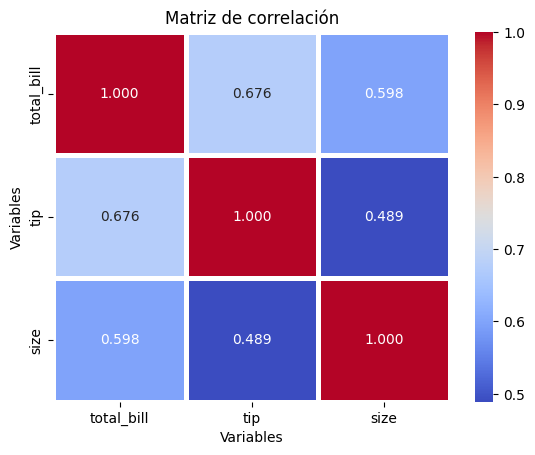

In [51]:
correlation= df[['total_bill', 'tip','size']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".3f", linewidth=3.5, linecolor='white')
plt.title('Matriz de correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

**b) Diagrama de Violín:**

*   **Objetivo:** Mostrar la distribución de las propinas (tip) para diferentes días de la semana.


*   **Instrucciones:** Utiliza un diagrama de violín para comparar cómo varía la distribución de las propinas en cada uno de los días (day).


*   Personaliza el gráfico con colores y etiquetas adecuadas.






<ipython-input-48-6496f3e3fa57>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day', y='total_bill', data=df, palette='muted', linewidth=1.0, linecolor='black')


Text(0, 0.5, 'Propina')

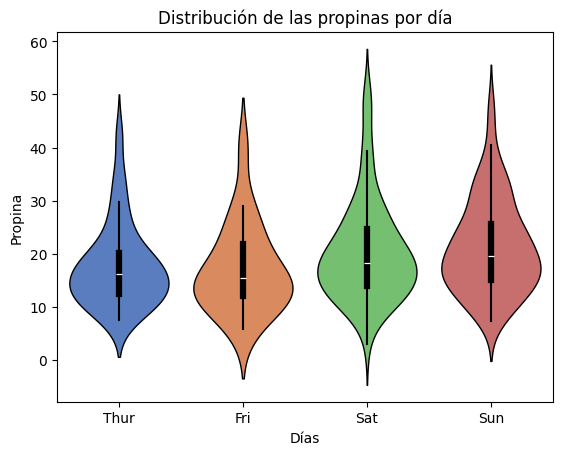

In [48]:
sns.violinplot(x='day', y='total_bill', data=df, palette='muted', linewidth=1.0, linecolor='black')
plt.title('Distribución de las propinas por día')
plt.xlabel('Días')
plt.ylabel('Propina')

**c) Gráfico de dispersión (Scatter Plot):**

*   **Objetivo:** Analizar la relación entre el total de la cuenta (total_bill) y la propina (tip).


*   **Instrucciones:** Crea un gráfico de dispersión con total_bill en el eje X y tip en el eje Y. Usa un color diferente para cada día de la semana.



Text(0, 0.5, 'Propina')

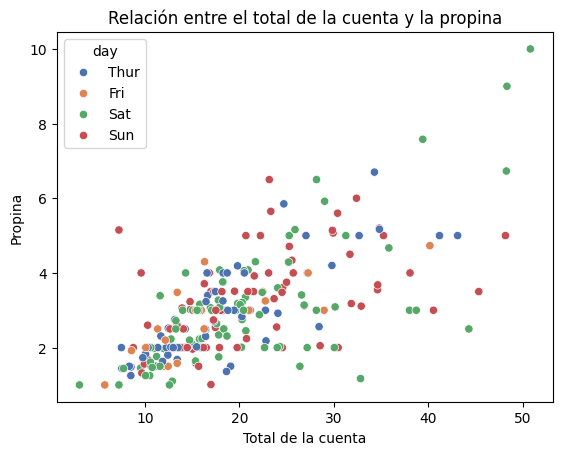

In [64]:
sns.scatterplot(x='total_bill', y='tip', data=df, hue='day', palette='deep')
plt.title('Relación entre el total de la cuenta y la propina')
plt.xlabel('Total de la cuenta')
plt.ylabel('Propina')

**d) Gráfico de barras (Bar Plot):**

*   **Objetivo:** Comparar el promedio de la propina (tip) por género (sex).


*   **Instrucciones:** Utiliza un gráfico de barras para mostrar el promedio de las propinas por género (hombres y mujeres).



<ipython-input-78-55b5f14d84ef>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio = df.groupby('sex')['tip'].mean().reset_index()


Text(0, 0.5, 'Promedio de la propina')

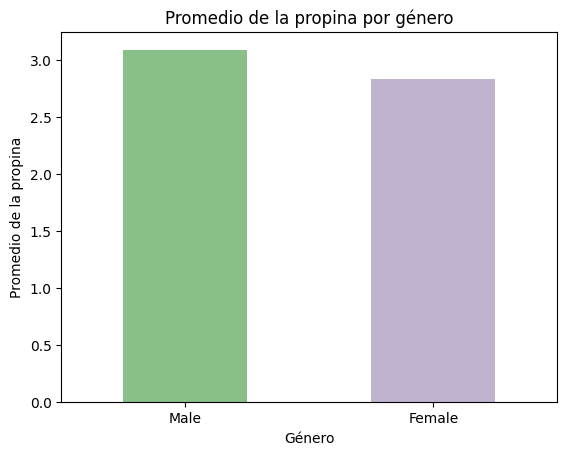

In [78]:
promedio = df.groupby('sex')['tip'].mean().reset_index()

sns.barplot(x='sex', y='tip', data=promedio, hue='sex', width=0.5)
plt.title('Promedio de la propina por género')
plt.xlabel('Género')
plt.ylabel('Promedio de la propina')